In [17]:
import numpy as np
from matplotlib import pyplot as plt
#Accion
def do_action(styles, style_number):
  result = np.random.uniform()
  return int(result <= styles[style_number])

In [18]:

def select_action(epsilon, average_rewards):
  #Numero aleatorio, si es menor a epsilon se toma una accion aleatoria, si no se toma la accion con mayor recompensa promedio.
  result = np.random.uniform()
  if result < epsilon:
    return np.random.randint(0, len(average_rewards)) 
  else:
    #Si todo es 0 deberia seleccionar una accion aleatoria
    if np.sum(average_rewards) == 0:
      return np.random.randint(0, len(average_rewards))
    return np.argmax(average_rewards) 

In [19]:
styles = [0.5,0.6,0.2]
num_iterations = 200
epsilon = 0.1
acum_samples_by_style = {"Iter":[0], "st1":[0], "st2":[0], "st3":[0]}

total_rewards = [0 for _ in range(len(styles))]
total_attempts = [0 for _ in range(len(styles))]
average_rewards = [0.0 for _ in range(len(styles))]

for iteration in range(num_iterations+1):
  action = select_action(epsilon, average_rewards)
  reward = do_action(styles, action)
  
  # Store result
  total_rewards[action] += reward
  total_attempts[action] += 1
  average_rewards[action] = total_rewards[action] / float(total_attempts[action])
  
  for i in range(len(styles)):
    if i != action:
      acum_samples_by_style["st"+str(i+1)].append(acum_samples_by_style["st"+str(i+1)][-1])
    
  acum_samples_by_style["st"+str(action+1)].append(acum_samples_by_style["st"+str(action+1)][-1]+1)    

  
  if iteration % 100 == 0:
    print('Recompensa promedio por estilos {} es {}'.format(iteration,
                                  ['{:.2f}'.format(elem) for elem in average_rewards]))

# Print results
best_bandit = np.argmax(average_rewards)
print('\nEl mejor estilo es {} con una recompensa promedio de  {:.4f}'
      .format(best_bandit, average_rewards[best_bandit]))
print('En {} episodios las recompensas fueron {}'
      .format(num_iterations, sum(total_rewards)))

Recompensa promedio por estilos 0 es ['0.00', '0.00', '0.00']
Recompensa promedio por estilos 100 es ['0.64', '0.65', '0.00']
Recompensa promedio por estilos 200 es ['0.61', '0.69', '0.11']

El mejor estilo es 1 con una recompensa promedio de  0.6897
En 200 episodios las recompensas fueron 132


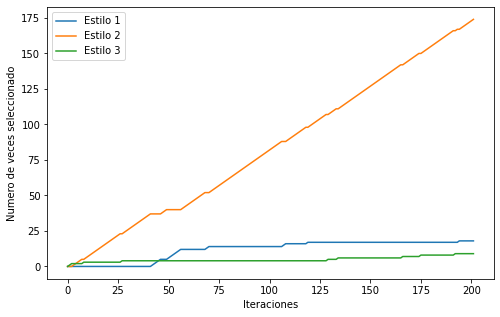

In [20]:
plt.figure(figsize=(8,5))
plt.plot(acum_samples_by_style["st1"], label="Estilo 1")
plt.plot(acum_samples_by_style["st2"], label="Estilo 2")
plt.plot(acum_samples_by_style["st3"], label="Estilo 3")
plt.legend()
plt.xlabel("Iteraciones")
plt.ylabel("Numero de veces seleccionado")
plt.show()